In [1]:
import pyart
import matplotlib.pyplot as plt
import os,glob
import numpy as np
import products
import sort_radar
from pyhail import mesh_ppi
from datetime import datetime, timedelta
from time import process_time


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# read the radar file
radar = pyart.aux_io.read_gamic('217BRS-20221030173104.HDF5')

In [3]:
# sort and perform the interpolation
radar = sort_radar.main(radar)

In [4]:
# evaluate the VIL, ET and VILD

start_time = process_time()

radar = products.calc_VIL(radar, 'corrected_reflectivity')
radar = products.calc_ET(radar, 'corrected_reflectivity')
radar = products.calc_VILD(radar, 'VIL', 'ET')

print("--- %s seconds ---" % (process_time() - start_time))

--- 22.7665114 seconds ---


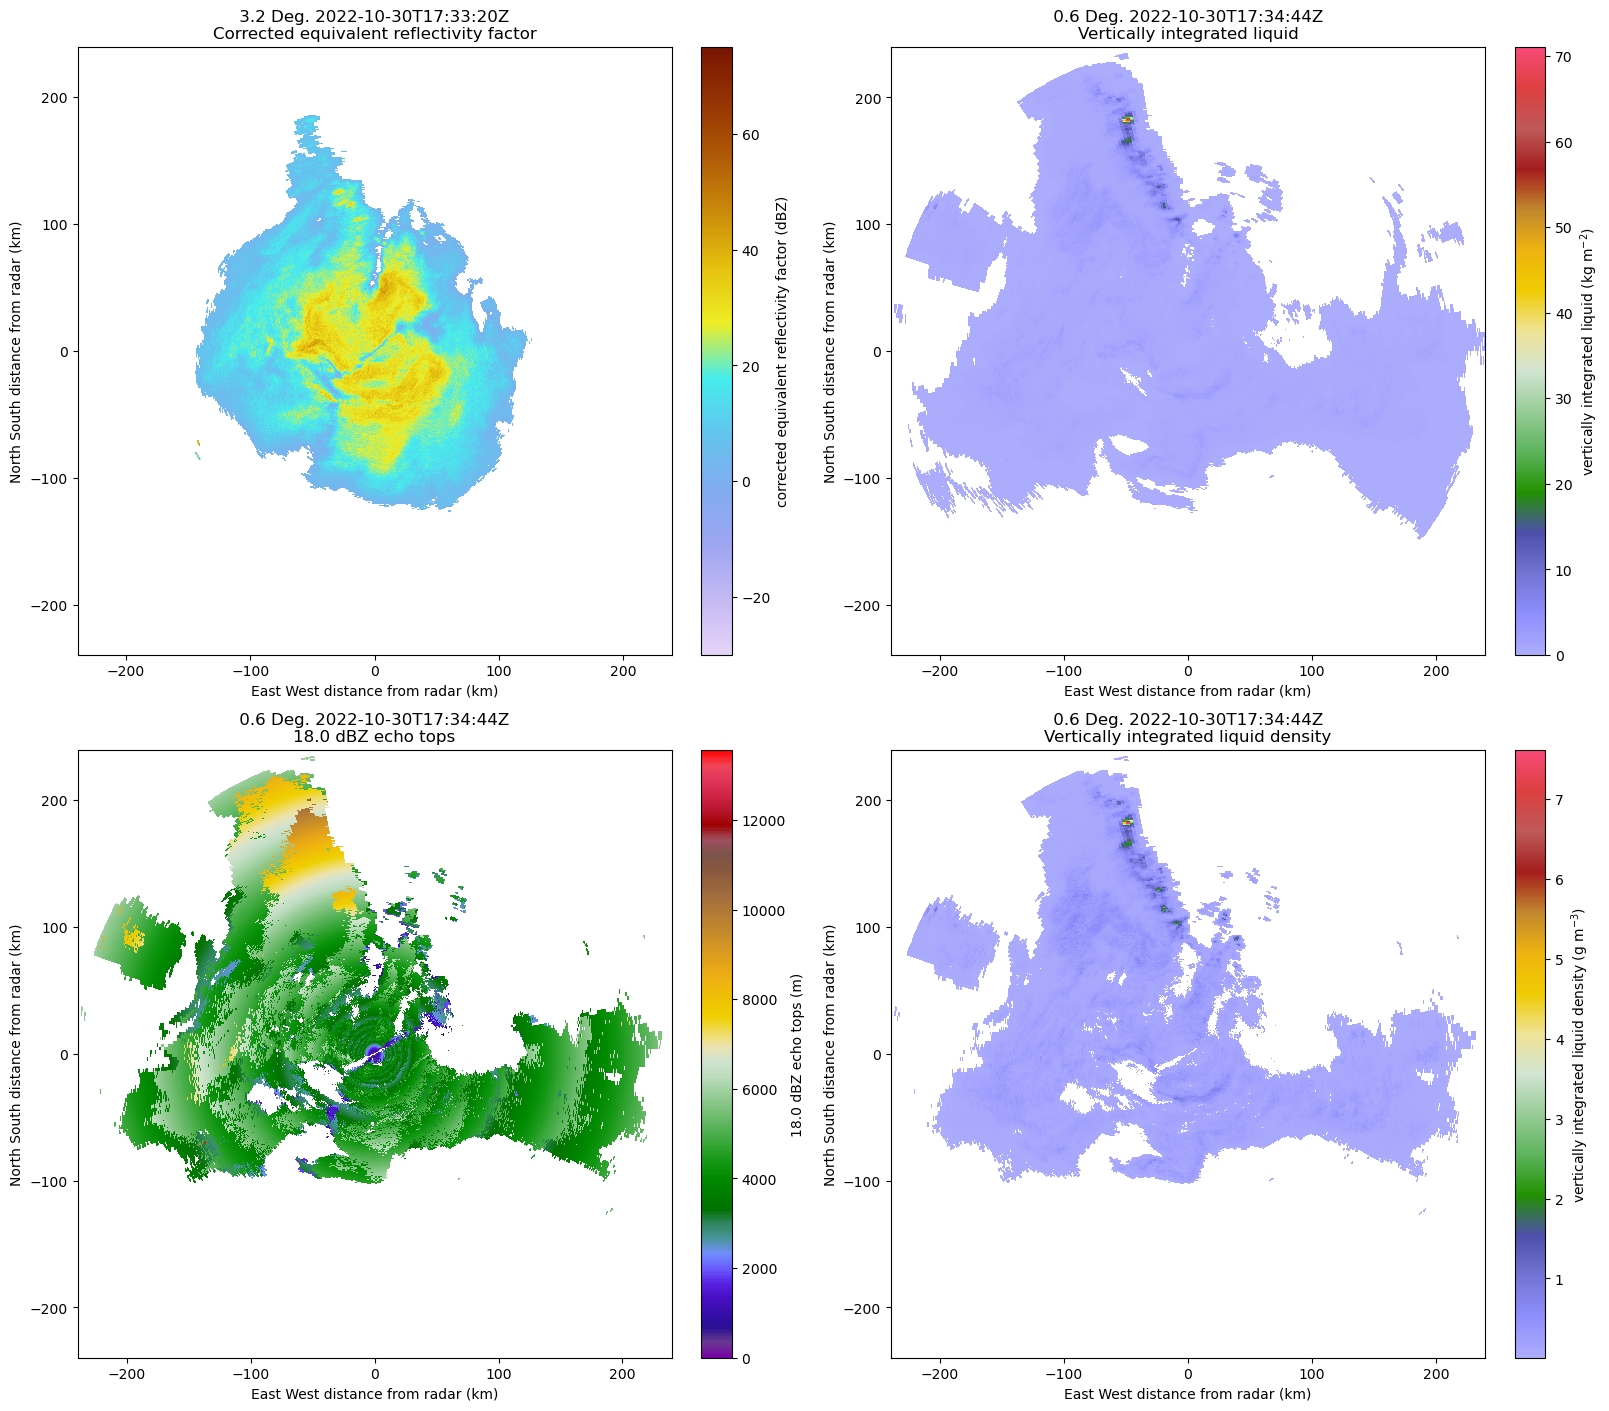

In [5]:
# display the output

display = pyart.graph.RadarDisplay(radar)

fig, axs = plt.subplots(2, 2, figsize = [16, 14], constrained_layout = True)
display.plot_ppi('corrected_reflectivity', 3, cmap = pyart.graph.cm.LangRainbow12, ax = axs.ravel()[0])
display.plot_ppi('VIL', 0, ax = axs.ravel()[1], cmap = pyart.graph.cm.Theodore16)
display.plot_ppi('ET', 0, ax = axs.ravel()[2], cmap = pyart.graph.cm.Carbone42)
display.plot_ppi('VILD', 0, ax = axs.ravel()[3], cmap = pyart.graph.cm.Theodore16)

#plt.savefig('/mnt/c/Users/User/Desktop/aa.jpg', dpi = 300, bbox_inches = 'tight')

In [7]:
field = radar.get_field(0, 'corrected_reflectivity')

In [8]:
field.dtype

dtype('float32')